In [12]:
import numpy as np
import matplotlib.pyplot as plt

# 1: Node

In [2]:
def neural_network(_input, weight=0.1):
    prediction = _input * weight
    return prediction

In [4]:
inputs = np.random.uniform(1, 10, 5)
_input = inputs[0]

print('input:', _input)

print('\nprediction:', neural_network(_input))

input: 5.896735983341859

prediction: 0.589673598334186


Think of `weights` as _sensitivity_ knobs. They determine the impact of your inputs on your output. And your __neural network__ is just a fancy function to perform trial-and-error. You tweak these "knobs" to better map the relation between your input and output. 

# 2: Multiple Inputs

In [5]:
def weighted_sum(inputs, weights):
    assert len(inputs) == len(weights)
    pred = 0
    
    for i in range(len(inputs)):
        pred += inputs[i]*weights[i]
        
    return pred

def neural_network(inputs, weights):
    pred = weighted_sum(inputs, weights)
    return pred

In [6]:
inputs = np.random.uniform(1, 10, 5)
weights = np.random.uniform(1, 10, 5)

print('inputs:', inputs)
print('weights:', weights)
print('\nprediction:', neural_network(inputs, weights))

inputs: [6.63688685 2.46943423 3.51398331 3.68626505 7.8058235 ]
weights: [8.16317281 3.55392672 1.10042642 3.27688316 6.75178809]

prediction: 131.6038485828217


__Fun analogy: Think of `weights` as logical gates.__

``` 
    weights = [1, 0, 1]    ⟹ if input[0] or input[2]
    weights = [-1, 0, 0]   ⟹ if NOT input[0]
    weights = [0.5, 1, -1] ⟹ if BIG input[1] or input[2] or NOT input[2]
```

## 2.1: Vectorized Implementation

In [7]:
def neural_network(inputs, weights):
    prediction = np.dot(inputs, weights)
    return prediction

In [8]:
inputs = np.random.uniform(1, 10, 5)
weights = np.random.uniform(1, 10, 5)

print('inputs:', inputs)
print('weights:', weights)
print('\nprediction:', neural_network(inputs, weights))

inputs: [1.32676645 3.2993488  7.28709017 4.43146487 6.46776967]
weights: [5.39245707 3.57744419 1.91113977 2.157957   6.17081936]

prediction: 82.35876404490676


# 3: Multiple Inputs & Outputs

Think of the network as a series of nodes. You're just doing the above weighted sum operation for each of those nodes, consequently.

<img src="Simple NN.png">

In [13]:
def weighted_sum(inp, wgt):
    assert len(inp) == len(wgt)
    op = 0
    
    for i in range(len(inp)):
        op += inp[i] * wgt[i]
        
    return op

def multi_wsum(vect, matrix):
    assert len(vect) == len(matrix)
    output = []
    
    for i in range(len(vect)):
        output.append(weighted_sum(vect, matrix[i]))
    return output

def neural_network(inputs, weights):
    pred = multi_wsum(inputs, weights)
    return pred

In [14]:
inputs = np.random.randint(-7, 7, 3)
weights = np.array([np.random.randint(-7, 7, 3) for i in range(3)])

print('inputs:', inputs)
print('weights:\n', weights)
print('\nprediction:', neural_network(inputs, weights))

inputs: [-5  6  6]
weights:
 [[ 4 -6 -7]
 [-2  0 -6]
 [ 0  5 -1]]

prediction: [-98, -26, 24]


In [15]:
[(weights[0][0]*inputs[0]) + (weights[0][1]*inputs[1]) + (weights[0][2]*inputs[2]), 
 (weights[1][0]*inputs[0]) + (weights[1][1]*inputs[1]) + (weights[1][2]*inputs[2]), 
 (weights[2][0]*inputs[0]) + (weights[2][1]*inputs[1]) + (weights[2][2]*inputs[2])]

[-98, -26, 24]

# Hidden Layers

<img src="Hidden_NN.png">

In [3]:
def vector_mult(inp, wgt):
    return np.dot(inp, wgt)

def neural_network(inputs, weights):
    hidden = vector_mult(inputs, weights[0])
    pred = vector_mult(inputs, weights[1])
    return pred

In [4]:
inputs = np.random.randint(1, 100, 5)
ih_weights = np.array([np.random.uniform(1, 10, 5) for i in range(5)])
ho_weights = np.array([np.random.uniform(1, 10, 5) for i in range(5)])
weights = [ih_weights, ho_weights]

print('inputs:', inputs)
print('weights (input-hidden):\n', ih_weights)
print('weights (hidden-output):\n', ho_weights)
print('\nprediction:', neural_network(inputs, weights))

inputs: [56 65 97 68 66]
weights (input-hidden):
 [[1.49339159 3.75999015 7.40572827 5.00936213 6.438203  ]
 [7.12067093 3.6951563  3.35397602 9.30203903 6.05722434]
 [5.08040716 3.24196362 2.8361506  8.38514631 2.65683486]
 [3.75041854 2.71531395 6.72266344 8.4611572  3.44647314]
 [6.26748874 4.10718515 8.76811026 6.08803609 2.37955617]]
weights (hidden-output):
 [[3.9911154  2.08008322 7.57609461 8.5693905  1.05715246]
 [1.13841144 3.84977835 9.19902008 4.9240615  3.30488756]
 [7.03024376 6.41840583 2.32495491 8.56293092 2.90896256]
 [3.85431905 5.57634943 7.03630498 3.98538684 2.21037102]
 [3.36585035 5.28188286 1.31866603 4.65270192 2.85735597]]

prediction: [1463.6726689  1717.10164893 1813.21892643 2208.63879573  895.07832078]


# 4. Hot & Cold Learning

As seen above, you tweak weights (knobs) until you get the error as close to zero as possible.

In [6]:
def neural_network(inputs, weights):
    return inputs*weights

def loss_fn(pred, goal):
    return (pred-goal)**2

In [82]:
iterations = 2000
ip = 1
wgt = 0.05
goal = 2.1
step_amount = 0.001 # tweak weight

In [83]:
error_history = []

print('Weight before optimization', wgt, '\n')

for i in range(1, iterations+1):
    pred = neural_network(ip, wgt)
    error = loss_fn(pred, goal)
    
    up_pred = neural_network(ip, wgt+step_amount)
    up_error = loss_fn(up_pred, goal)
    
    dn_pred = neural_network(ip, wgt-step_amount)
    dn_error = loss_fn(dn_pred, goal)
    
    if dn_error < up_error:
        wgt -= step_amount
    else:
        wgt += step_amount
        
    error_history.append(error)
    if i%100==0:
        print('Error after iteration', i, ':', error)
    
print('\nWeight after optimization', wgt)

Weight before optimization 0.05 

Error after iteration 100 : 3.806401
Error after iteration 200 : 3.426201
Error after iteration 300 : 3.0660009999999995
Error after iteration 400 : 2.7258009999999993
Error after iteration 500 : 2.405600999999999
Error after iteration 600 : 2.1054009999999987
Error after iteration 700 : 1.8252009999999987
Error after iteration 800 : 1.5650009999999985
Error after iteration 900 : 1.3248009999999986
Error after iteration 1000 : 1.1046010000000102
Error after iteration 1100 : 0.9044010000000301
Error after iteration 1200 : 0.7242010000000457
Error after iteration 1300 : 0.5640010000000568
Error after iteration 1400 : 0.42380100000006365
Error after iteration 1500 : 0.303601000000066
Error after iteration 1600 : 0.20340100000006395
Error after iteration 1700 : 0.1232010000000575
Error after iteration 1800 : 0.06300100000004664
Error after iteration 1900 : 0.02280100000003139
Error after iteration 2000 : 0.0026010000000117025

Weight after optimization 2.0

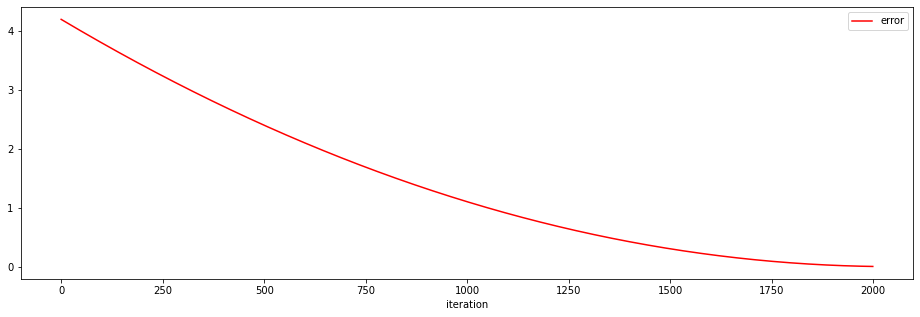

In [86]:
plt.figure(figsize=(16, 5))
plt.plot(error_history, c='r')
plt.xlabel('iteration')
plt.legend(['error'])
plt.show()

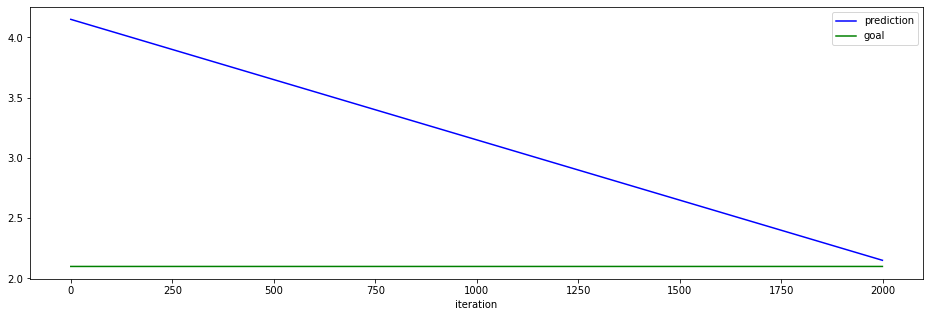

In [88]:
fig, ax = plt.subplots(1, figsize=(16, 5))
ax.plot(np.sqrt(np.array(error_history)) + goal, c='b')
ax.plot([goal]*iterations, c='g')
plt.legend(['prediction', 'goal'])
plt.xlabel('iteration')
plt.show()